Відомості про моделі:
1. Model Name: Falcon3
   - Version: latest
   - Modified At: 2024-12-29 20:55:16 UTC
   - Digest: 472ea1c89f64f932368963bfb8c7f54bd797f2161932cf0a72766a587b2e586d
   - Size: 4.57 GB
   - Format: gguf
   - Family: llama
   - Parameter Size: 7.5B
   - Quantization Level: Q4_K_M

2. Model Name: llama3.2
   - Version: latest
   - Modified At: 2024-12-29 20:48:03 UTC
   - Digest: a80c4f17acd55265feec403c7aef86be0c25983ab279d83f3bcd3abbcb5b8b72
   - Size: 2.02 GB
   - Format: gguf
   - Family: llama
   - Parameter Size: 3.2B
   - Quantization Level: Q4_K_M

Команди для запуску у Docker:

docker run -d --gpus=all -v ollama:/root/.ollama -p 11434:11434 --name ollama ollama/ollama

docker exec -it ollama ollama run Falcon3

docker exec -it ollama ollama run llama3.2

Особисті спостереження:
Хоча й очікувалось, що Falcon3 потребує більше пам'яті та обчислювальної потужності через свій розмір, під час роботи виявилось, що llama3.2 набагато більше використовує графічний процесор.

In [2]:
import os

def clear_results_folder(folder_path):
    if not os.path.exists(folder_path):
        print(f"Папка {folder_path} не существует.")
        return
    
    # Удаление всех файлов в папке
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path):
                os.remove(file_path)
        except Exception as e:
            print(f"Помилка при спробі видалити файл {file_path}: {e}")


In [3]:
from ollama import chat
def chat_with_model(model_name, prompt):
    messages = [{"role": "user", "content": prompt}]
    response = chat(model_name, messages=messages)

    return response

In [4]:
import json
import os
def save_response_to_file(log_data, output_file):
    if os.path.exists(output_file):
        with open(output_file, "r") as file:
            try:
                data = json.load(file)
            except json.JSONDecodeError:
                data = []
    else:
        data = []

    data.append(log_data)

    with open(output_file, "w") as file:
        json.dump(data, file, indent=4)

In [5]:
from datetime import datetime

clear_results_folder("results")

prompts = [
    "What is the capital of France?",
    "Tell me a joke.",
    "Explain quantum physics in simple terms.",
    "Why is the sky blue?"
]

models = [
    "Falcon3",
    "Llama3.2"
]

for model in models:
    for prompt in prompts:
        response = chat_with_model(model, prompt)
        log_data = {
        "timestamp": datetime.now().isoformat(),
        "model": model,
        "prompt": prompt,
        "response": response["message"]["content"],
        "total_duration": response.get("total_duration", None),
        "total_duration_seconds": response.get("total_duration", 0) / 1_000_000_000 if response.get("total_duration") else None,
        "prompt_eval_count": response.get("prompt_eval_count", None),
        "eval_count": response.get("eval_count", None),
        "done_reason": response.get("done_reason", None)
        }
        save_response_to_file(log_data, "results/" + model + "_first_test.json")



    

In [6]:
print("completed")

completed


In [7]:
import json

def load_logs(file_path):
    with open(file_path, "r") as file:
        return json.load(file)

In [8]:
import pandas as pd

def analyze_logs(logs):
    data = []

    for log in logs:
        data.append({
            "Timestamp": log["timestamp"],
            "Model": log["model"],
            "Prompt": log["prompt"],
            "Response": log["response"],
            "Total Duration (s)": log.get("total_duration_seconds", 0),
            "Tokens Generated": log.get("eval_count", 0),
            "Done Reason": log.get("done_reason", "unknown")
        })

    df = pd.DataFrame(data)

    avg_duration = df["Total Duration (s)"].mean()
    avg_tokens = df["Tokens Generated"].mean()

    summary = {
        "Timestamp": "Average",
        "Model": "All Models",
        "Prompt": "N/A",
        "Response": "N/A",
        "Total Duration (s)": avg_duration,
        "Tokens Generated": avg_tokens,
        "Done Reason": "N/A"
    }
    df = pd.concat([df, pd.DataFrame([summary])], ignore_index=True)

    return df


Аналіз першого тесту

In [9]:
import matplotlib.pyplot as plt

def plot_analysis_results(df, model_name):
    data = df[df["Timestamp"] != "Average"]

    plt.figure(figsize=(10, 6))
    plt.bar(data["Prompt"], data["Total Duration (s)"], color="skyblue")
    plt.title(f"Response Duration for {model_name}")
    plt.xlabel("Prompts")
    plt.ylabel("Duration (seconds)")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(data["Prompt"], data["Tokens Generated"], color="lightgreen")
    plt.title(f"Tokens Generated by {model_name}")
    plt.xlabel("Prompts")
    plt.ylabel("Number of Tokens")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

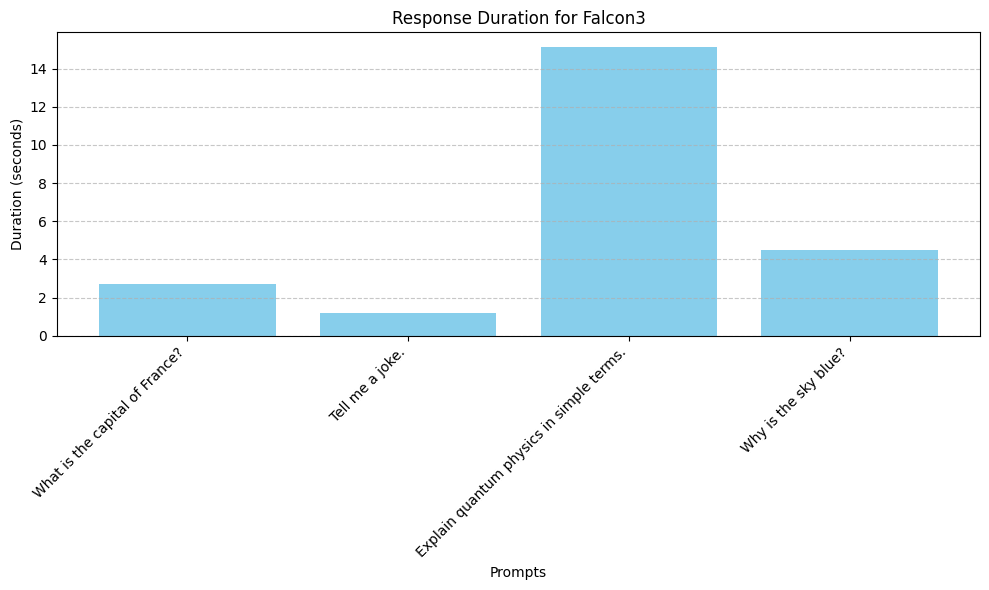

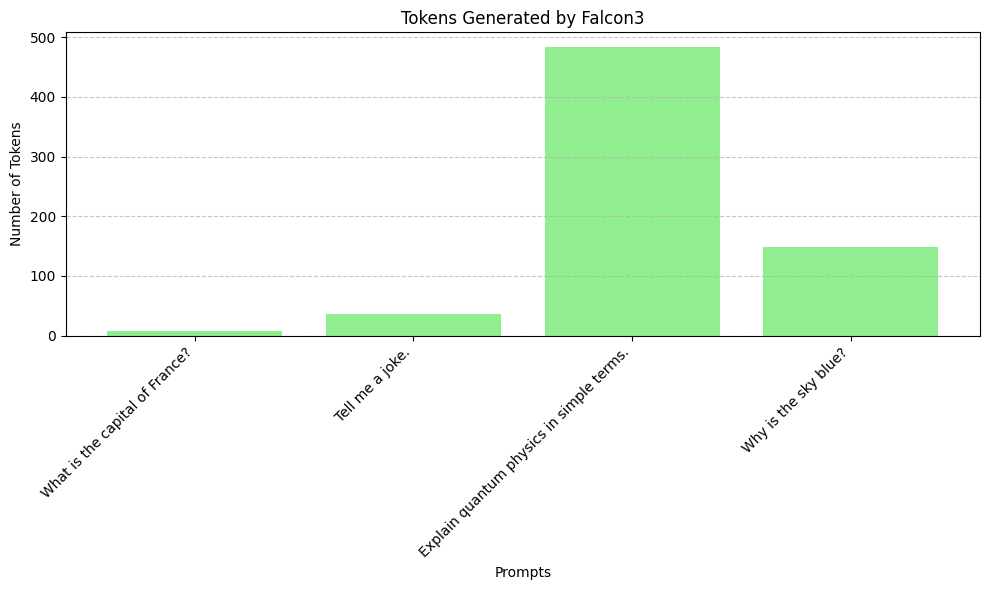

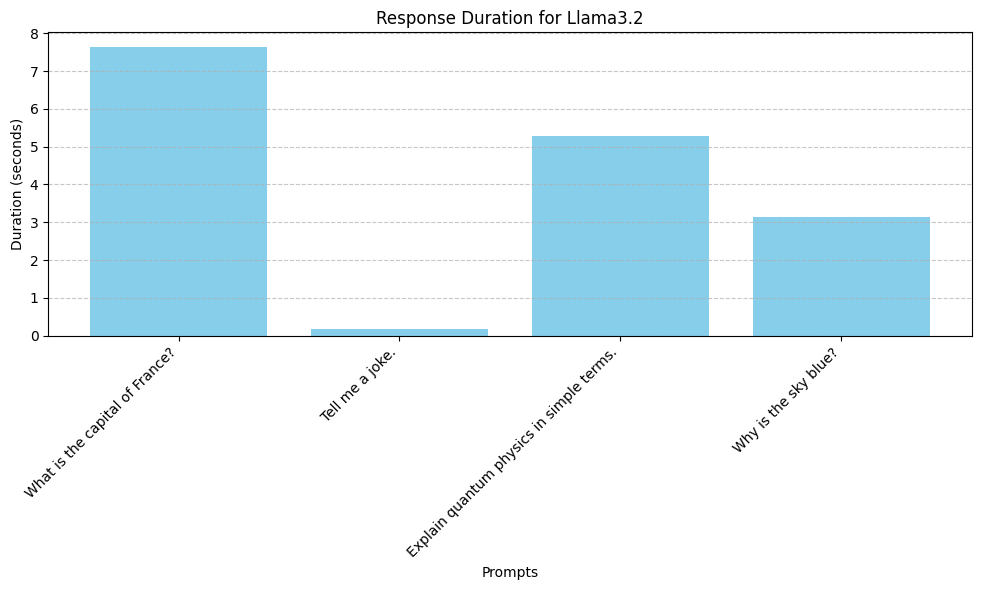

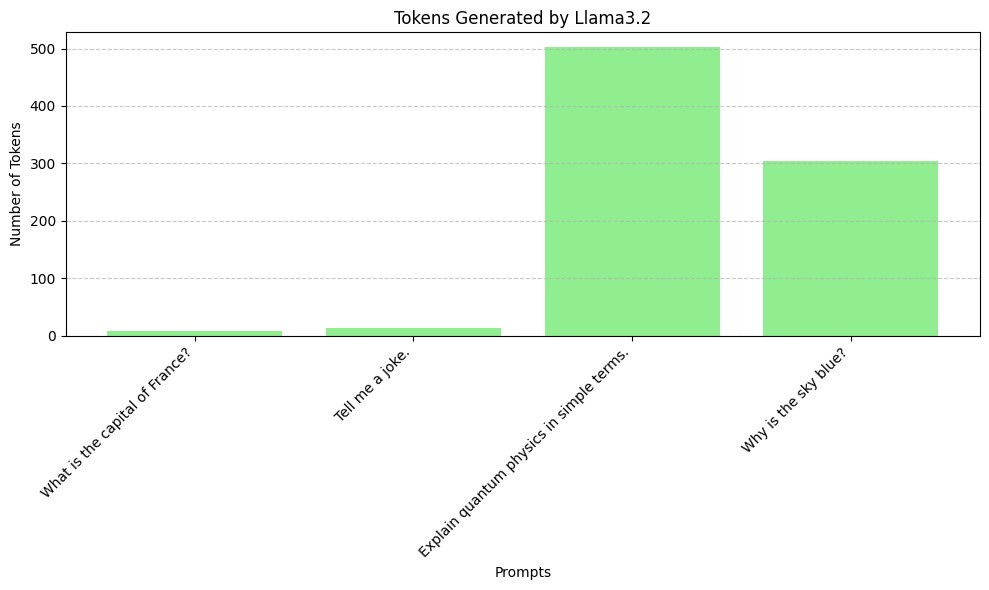

In [10]:
falcon_logs = load_logs("results/Falcon3_first_test.json")
llama_logs = load_logs("results/Llama3.2_first_test.json")

falcon_df = analyze_logs(falcon_logs)
plot_analysis_results(falcon_df, "Falcon3")

llama_df = analyze_logs(llama_logs)
plot_analysis_results(llama_df, "Llama3.2")


2 тест

In [11]:
from ollama import chat
def generate_with_model(model_name, prompt):
    messages = [{"role": "user", "content": prompt}]
    response = generate(model_name, messages=messages)

    return response

In [12]:
for model in models:
    for prompt in prompts:
        response = chat_with_model(model, prompt)
        log_data = {
        "timestamp": datetime.now().isoformat(),
        "model": model,
        "prompt": prompt,
        "response": response["message"]["content"],
        "total_duration": response.get("total_duration", None),
        "total_duration_seconds": response.get("total_duration", 0) / 1_000_000_000 if response.get("total_duration") else None,
        "prompt_eval_count": response.get("prompt_eval_count", None),
        "eval_count": response.get("eval_count", None),
        "done_reason": response.get("done_reason", None)
        }
        save_response_to_file(log_data, "results/" + model + "_second_test.json")

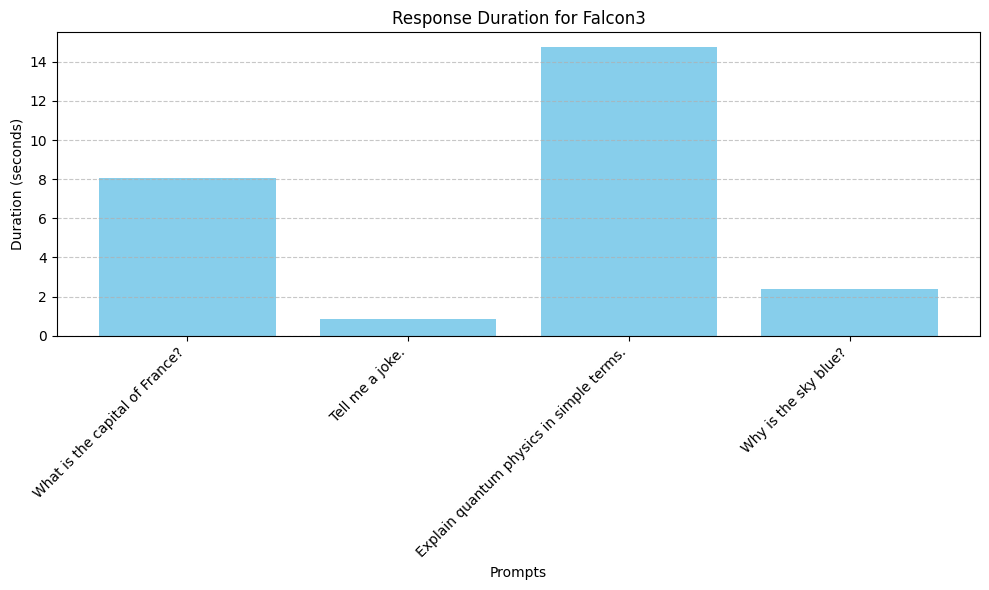

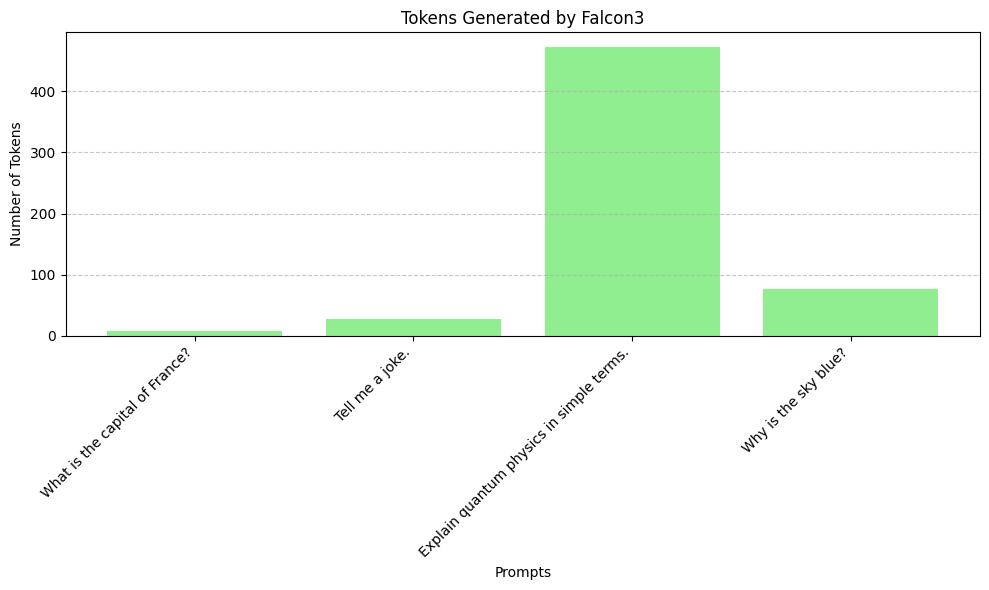

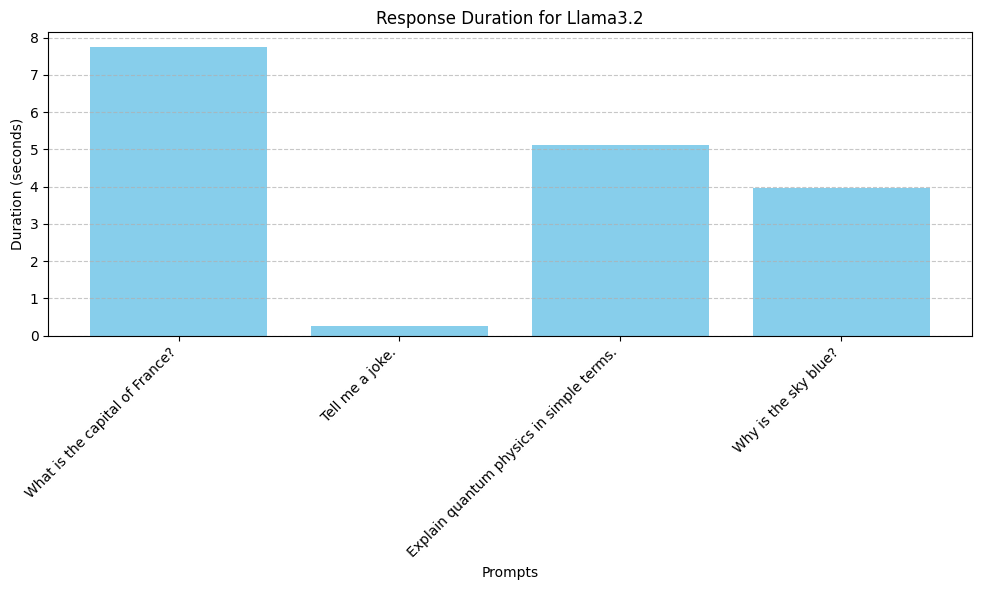

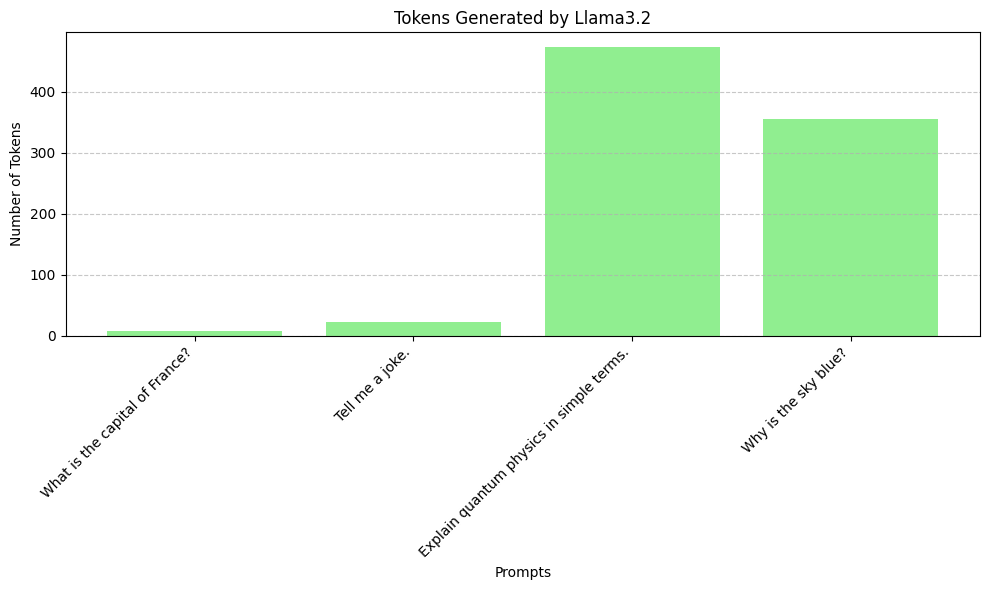

In [13]:
falcon_logs = load_logs("results/Falcon3_second_test.json")
llama_logs = load_logs("results/Llama3.2_second_test.json")

falcon_df = analyze_logs(falcon_logs)
plot_analysis_results(falcon_df, "Falcon3")

llama_df = analyze_logs(llama_logs)
plot_analysis_results(llama_df, "Llama3.2")

3 тест

In [14]:
from PyPDF2 import PdfReader
from ollama import chat
import time


def load_pdf(file_path):
    reader = PdfReader(file_path)
    text = []
    for page in reader.pages:
        text.append(page.extract_text())
    return "\n".join(text)

In [15]:
def chat_with_context(model_name, context, prompt):
    prompt = f"""Use the following context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Use three sentences maximum and keep the answer as concise as possible.

Context:
{context}

Question: {question}
Helpful Answer:"""
    messages = [{"role": "user", "content": prompt}]
    response = chat(model_name, messages=messages)
    
    return response

In [16]:
pdf_path = "inputs/CompanyInformation.pdf"

questions = [
    "What is the revenue mentioned in the document?",
    "What are the company's future goals?",
    "Explain the key highlights of the company's AI platform.",
]

context = load_pdf(pdf_path)

for model in models:
    for question in questions:
        response = chat_with_context(model, context, question)
        log_data = {
        "timestamp": datetime.now().isoformat(),
        "model": model,
        "prompt": question,
        "response": response["message"]["content"],
        "total_duration": response.get("total_duration", None),
        "total_duration_seconds": response.get("total_duration", 0) / 1_000_000_000 if response.get("total_duration") else None,
        "prompt_eval_count": response.get("prompt_eval_count", None),
        "eval_count": response.get("eval_count", None),
        "done_reason": response.get("done_reason", None)
        }
        save_response_to_file(log_data, "results/" + model + "_third_test.json")

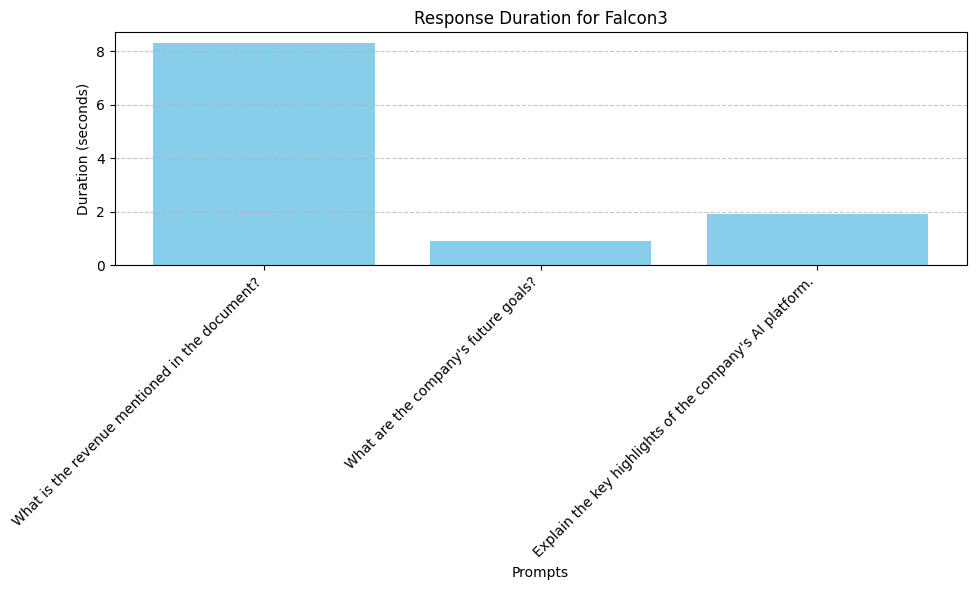

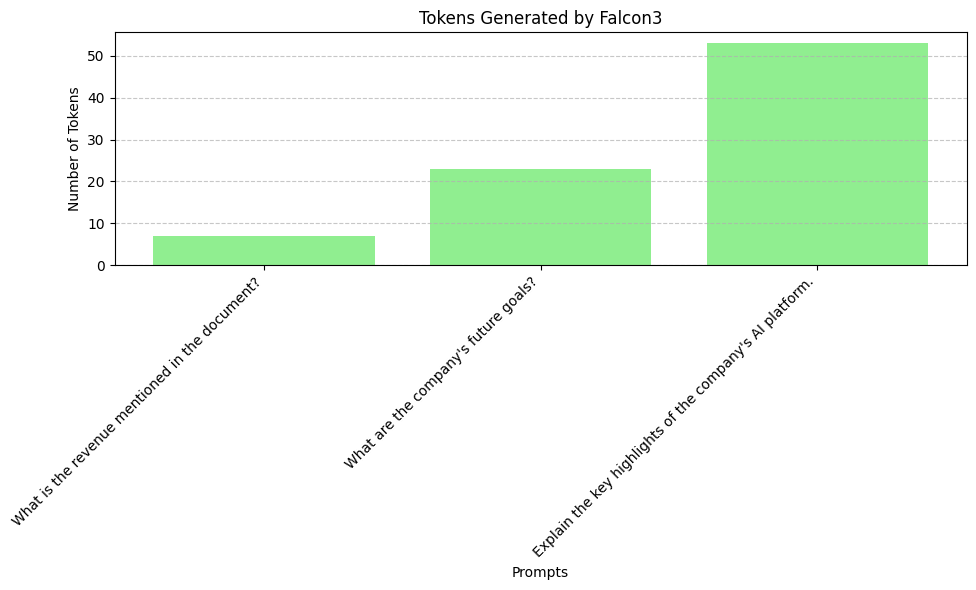

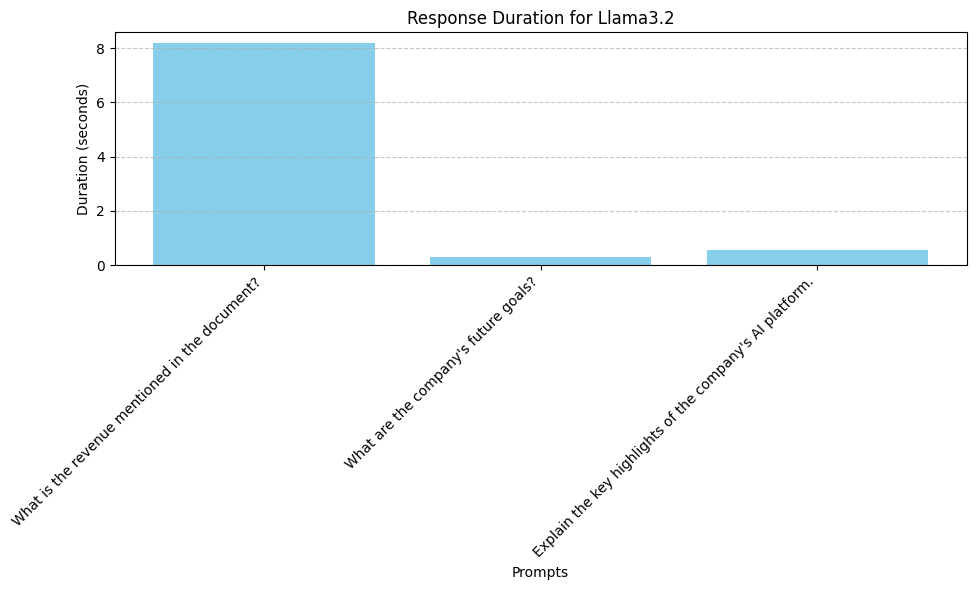

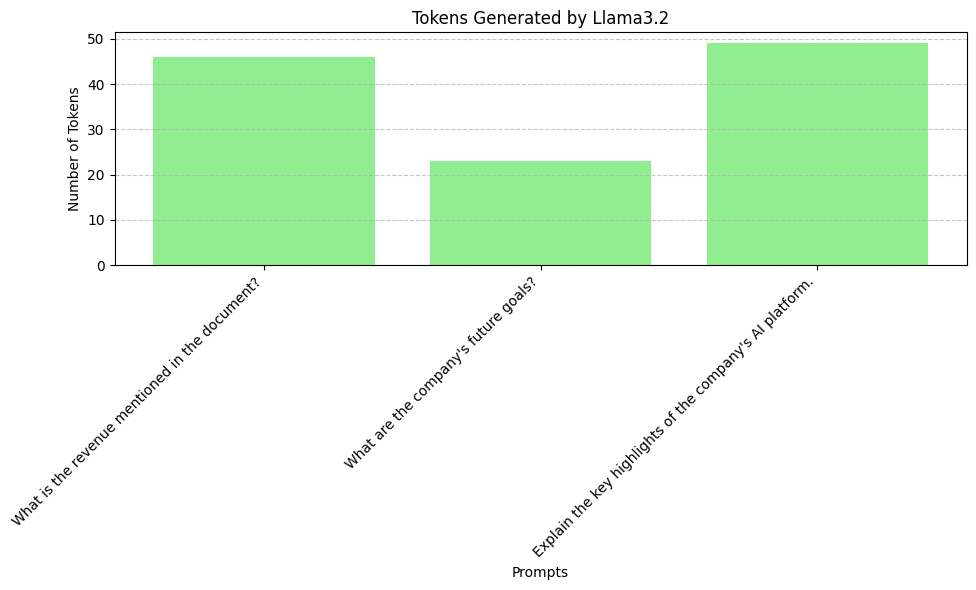

In [17]:
falcon_logs = load_logs("results/Falcon3_third_test.json")
llama_logs = load_logs("results/Llama3.2_third_test.json")

falcon_df = analyze_logs(falcon_logs)
plot_analysis_results(falcon_df, "Falcon3")

llama_df = analyze_logs(llama_logs)
plot_analysis_results(llama_df, "Llama3.2")